In [24]:
import berserk;
import matplotlib.pyplot as plt;
import numpy as np;
import pandas as pd

In [13]:
f = open("lichess.txt", "r")
token = (f.read())
token = token.strip()
session = berserk.TokenSession(token)
client = berserk.Client (session=session)

In [14]:
client.account.get()

{'id': 'brechner',
 'username': 'Brechner',
 'perfs': {'blitz': {'games': 1538, 'rating': 1557, 'rd': 49, 'prog': -22},
  'puzzle': {'games': 3, 'rating': 1647, 'rd': 310, 'prog': 0, 'prov': True},
  'bullet': {'games': 9, 'rating': 1223, 'rd': 154, 'prog': 0, 'prov': True},
  'correspondence': {'games': 0,
   'rating': 1500,
   'rd': 500,
   'prog': 0,
   'prov': True},
  'classical': {'games': 0,
   'rating': 1500,
   'rd': 500,
   'prog': 0,
   'prov': True},
  'rapid': {'games': 0, 'rating': 1500, 'rd': 500, 'prog': 0, 'prov': True}},
 'createdAt': datetime.datetime(2019, 1, 20, 11, 46, 42, 448000, tzinfo=datetime.timezone.utc),
 'seenAt': datetime.datetime(2022, 10, 27, 16, 37, 4, 465000, tzinfo=datetime.timezone.utc),
 'playTime': {'total': 342486, 'tv': 0},
 'url': 'https://lichess.org/@/Brechner',
 'count': {'all': 1548,
  'rated': 1547,
  'ai': 0,
  'draw': 68,
  'drawH': 68,
  'loss': 748,
  'lossH': 748,
  'win': 732,
  'winH': 732,
  'bookmark': 0,
  'playing': 0,
  'import

In [15]:
brechner_data = client.users.get_rating_history('Brechner')
brechner_data

[{'name': 'Bullet',
  'points': [Entry(year=2019, month=0, day=28, rating=1319),
   Entry(year=2021, month=6, day=31, rating=1174),
   Entry(year=2021, month=7, day=14, rating=1218),
   Entry(year=2021, month=8, day=1, rating=1219),
   Entry(year=2021, month=8, day=2, rating=1223)]},
 {'name': 'Blitz',
  'points': [Entry(year=2021, month=6, day=28, rating=1210),
   Entry(year=2021, month=6, day=29, rating=1454),
   Entry(year=2021, month=6, day=30, rating=1572),
   Entry(year=2021, month=6, day=31, rating=1556),
   Entry(year=2021, month=7, day=1, rating=1614),
   Entry(year=2021, month=7, day=2, rating=1613),
   Entry(year=2021, month=7, day=3, rating=1627),
   Entry(year=2021, month=7, day=4, rating=1649),
   Entry(year=2021, month=7, day=6, rating=1692),
   Entry(year=2021, month=7, day=7, rating=1683),
   Entry(year=2021, month=7, day=14, rating=1661),
   Entry(year=2021, month=7, day=15, rating=1660),
   Entry(year=2021, month=7, day=16, rating=1620),
   Entry(year=2021, month=7, 

In [16]:
brechner_data = client.users.get_rating_history('Brechner')
df = pd.DataFrame(brechner_data[1])
df.head()

,name,points
0,Blitz,"(2021, 6, 28, 1210)"
1,Blitz,"(2021, 6, 29, 1454)"
2,Blitz,"(2021, 6, 30, 1572)"
3,Blitz,"(2021, 6, 31, 1556)"
4,Blitz,"(2021, 7, 1, 1614)"


In [17]:
df.get(["points"])


,points
0,"(2021, 6, 28, 1210)"
1,"(2021, 6, 29, 1454)"
2,"(2021, 6, 30, 1572)"
3,"(2021, 6, 31, 1556)"
4,"(2021, 7, 1, 1614)"
...,...
337,"(2022, 9, 13, 1567)"
338,"(2022, 9, 14, 1578)"
339,"(2022, 9, 22, 1571)"
340,"(2022, 9, 23, 1564)"


In [25]:
chess_data = pd.DataFrame(df['points'].to_list(),columns=['year','month','day','rating'])


In [26]:
chess_data

,year,month,day,rating
0,2021,6,28,1210
1,2021,6,29,1454
2,2021,6,30,1572
3,2021,6,31,1556
4,2021,7,1,1614
...,...,...,...,...
337,2022,9,13,1567
338,2022,9,14,1578
339,2022,9,22,1571
340,2022,9,23,1564


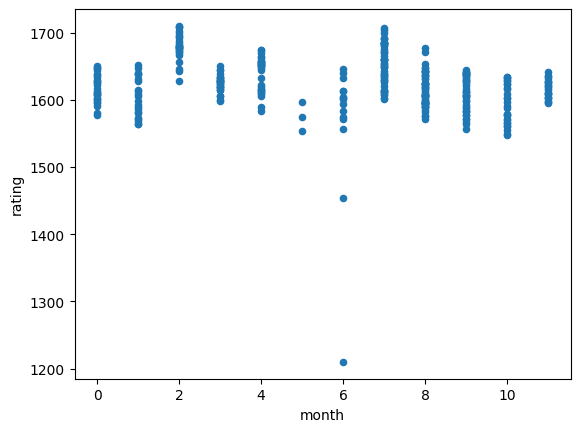

In [27]:

chess_data= pd.DataFrame(df['points'].to_list(),columns=['year','month','day','rating'])

chess_data.plot(kind = 'scatter', x = 'month', y = 'rating')

plt.show()

In [28]:
chess_data.describe()

,year,month,day,rating
count,342.000000,342.000000,342.000000,342.000000
mean,2021.611111,5.964912,15.827485,1622.675439
std,0.488212,3.371251,8.993126,41.688588
min,2021.000000,0.000000,1.000000,1210.000000
25%,2021.000000,3.000000,8.000000,1601.000000
50%,2022.000000,7.000000,16.000000,1623.000000
75%,2022.000000,9.000000,23.750000,1644.750000
max,2022.000000,11.000000,31.000000,1710.000000


In [29]:
new_array = np.array(chess_data)
new_array

array([[2021,    6,   28, 1210],
       [2021,    6,   29, 1454],
       [2021,    6,   30, 1572],
       ...,
       [2022,    9,   22, 1571],
       [2022,    9,   23, 1564],
       [2022,    9,   27, 1557]])